In [3]:
import numpy as np
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv('movies (1).csv')

In [5]:
# printing the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
# number of rows and columns in the data frame

movies_data.shape

(4803, 24)

In [7]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [8]:
# replacing the null valuess with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [9]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [10]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [11]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [12]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [13]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [14]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [15]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [16]:
print(similarity.shape)

(4803, 4803)


In [17]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

In [18]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [19]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Life of Pi', 'Pieces of April', 'Bridge of Spies']


In [20]:
close_match = find_close_match[0]
print(close_match)

Life of Pi


In [21]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

216


In [22]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.01790005311317757), (1, 0.0650530496390658), (2, 0.013548843567974131), (3, 0.01485821639516583), (4, 0.012894919447229003), (5, 0.018543053605906287), (6, 0.007619405173692093), (7, 0.013366656629099933), (8, 0.007775271031183508), (9, 0.01305922865964302), (10, 0.02013343882281693), (11, 0.01176400123931956), (12, 0.013521340009302177), (13, 0.016501473004500708), (14, 0.049983320358738245), (15, 0.0071872554206563214), (16, 0.012674431833866132), (17, 0.012934731426896624), (18, 0.0268878212991244), (19, 0.019561872162082168), (20, 0.017825760165646833), (21, 0.011113763367525162), (22, 0.011005376438389686), (23, 0.01456413998025134), (24, 0.024049611005843997), (25, 0.05352088184338699), (26, 0.013795552090045755), (27, 0.016306057911453863), (28, 0.10952152753992431), (29, 0.013855305222204607), (30, 0.013346517790711453), (31, 0.022168367547410927), (32, 0.0069646440673149755), (33, 0.013283605584266236), (34, 0.0), (35, 0.01394446242918785), (36, 0.012565073442079865), (

In [23]:
len(similarity_score)

4803

In [24]:
# print the name of similar movies based on the index
sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)
print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Life of Pi
2 . Million Dollar Arm
3 . Dil Jo Bhi Kahey...
4 . Partition
5 . Jurassic World
6 . In the Heart of the Sea
7 . Jaws
8 . The Lunchbox
9 . Crouching Tiger, Hidden Dragon
10 . Chocolate: Deep Dark Secrets
11 . Jab Tak Hai Jaan
12 . A Mighty Heart
13 . The Namesake
14 . Hulk
15 . Hidden Away
16 . Faith Connections
17 . Karachi se Lahore
18 . The Polar Express
19 . Two Brothers
20 . Brokeback Mountain
21 . The Ice Storm
22 . Moby Dick
23 . Housefull
24 . Into the Blue
25 . Sense and Sensibility
26 . The Jungle Book
27 . Pirates of the Caribbean: At World's End
28 . Nim's Island
29 . Charlotte's Web


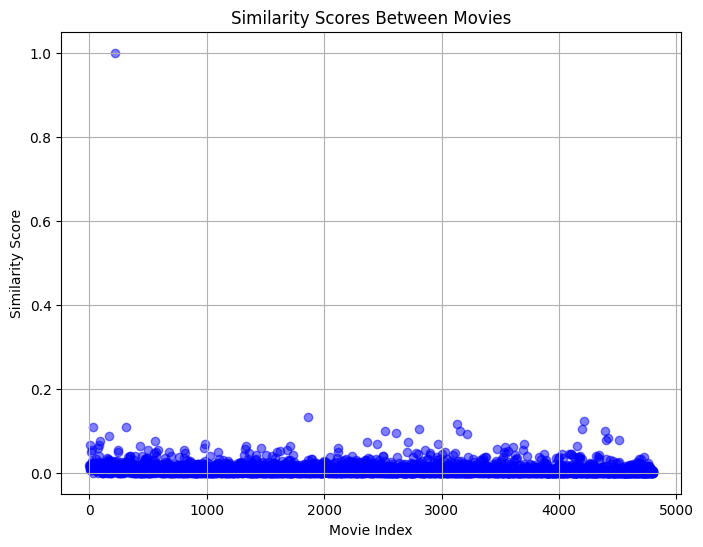

In [25]:
movie_indices = [movie[0] for movie in sorted_similar_movies]
similarity_scores = [movie[1] for movie in sorted_similar_movies]
plt.figure(figsize=(8, 6))
plt.scatter(movie_indices, similarity_scores, marker='o', color='b', alpha=0.5)
plt.xlabel('Movie Index')
plt.ylabel('Similarity Score')
plt.title('Similarity Scores Between Movies')
plt.grid(True)
plt.show()

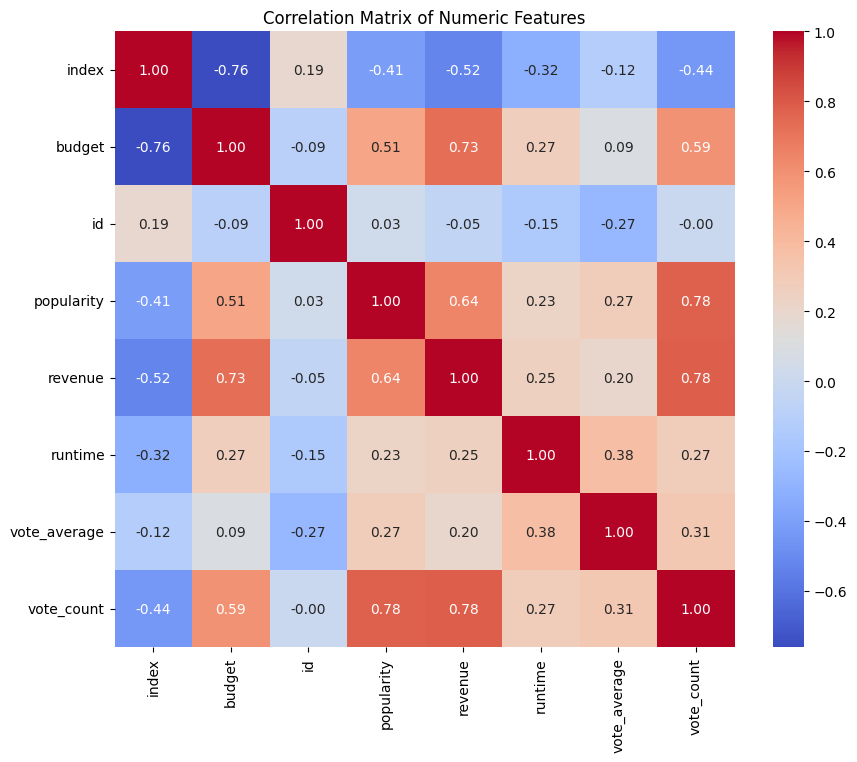

In [26]:
numeric_columns = movies_data.select_dtypes(include=[np.number]).columns
correlation_matrix = movies_data[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [27]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Life of Pi
2 . Million Dollar Arm
3 . Dil Jo Bhi Kahey...
4 . Partition
5 . Jurassic World
6 . In the Heart of the Sea
7 . Jaws
8 . The Lunchbox
9 . Crouching Tiger, Hidden Dragon
10 . Chocolate: Deep Dark Secrets
11 . Jab Tak Hai Jaan
12 . A Mighty Heart
13 . The Namesake
14 . Hulk
15 . Hidden Away
16 . Faith Connections
17 . Karachi se Lahore
18 . The Polar Express
19 . Two Brothers
20 . Brokeback Mountain
21 . The Ice Storm
22 . Moby Dick
23 . Housefull
24 . Into the Blue
25 . Sense and Sensibility
26 . The Jungle Book
27 . Pirates of the Caribbean: At World's End
28 . Nim's Island
29 . Charlotte's Web
